In [1]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.stats as stats
from pylab import pcolor, show, colorbar, xticks, yticks
from sklearn import preprocessing as preprocessing

# Question 2

In [74]:
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025

## Question 2 (a)

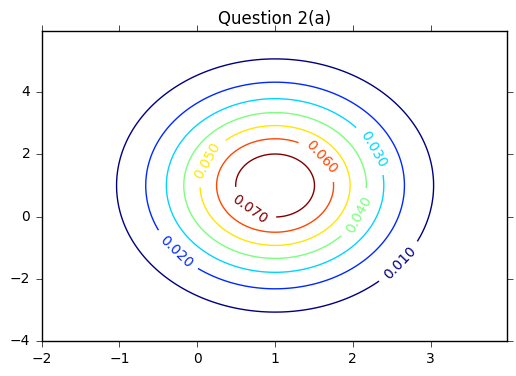

In [81]:
x = np.arange(-2, 4, delta)
y = np.arange(-4, 6, delta)
X, Y = np.meshgrid(x, y)

Z = mlab.bivariate_normal(X, Y, 1, 2, 1, 1, 0)

plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Question 2(a)')
plt.show()

## Question 2(b)

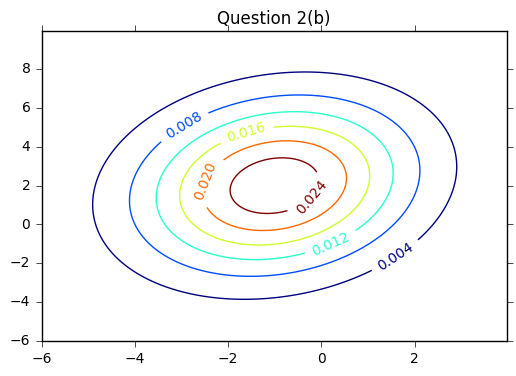

In [89]:
x = np.arange(-6, 4, delta)
y = np.arange(-6, 10, delta)
X, Y = np.meshgrid(x, y)

Z = mlab.bivariate_normal(X, Y, 2, 3, -1, 2, 1)

plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Question 2(b)')
plt.show()

## Question 2(c)

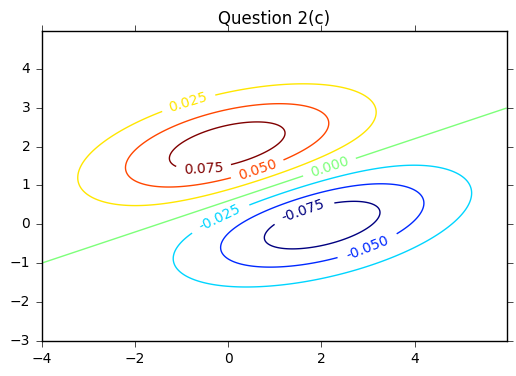

In [90]:
x = np.arange(-4, 6, delta)
y = np.arange(-3, 5, delta)
X, Y = np.meshgrid(x, y)

Z1 = mlab.bivariate_normal(X, Y, 2, 1, 0, 2, 1)
Z2 = mlab.bivariate_normal(X, Y, 2, 1, 2, 0, 1)
Z = Z1 - Z2

plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Question 2(c)')
plt.show()

## Question 2(d)

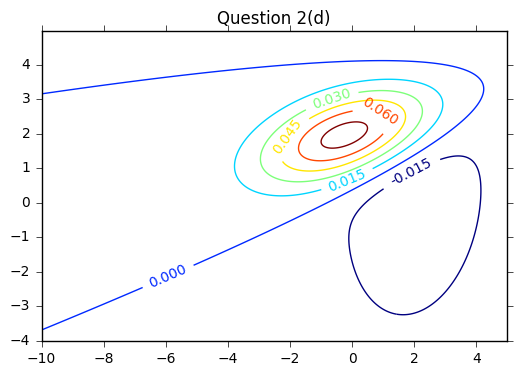

In [91]:
x = np.arange(-10, 5, delta)
y = np.arange(-4, 5, delta)
X, Y = np.meshgrid(x, y)

Z1 = mlab.bivariate_normal(X, Y, 2, 1, 0, 2, 1)
Z2 = mlab.bivariate_normal(X, Y, 2, 3, 2, 0, 1)
Z = Z1 - Z2

plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Question 2(d)')
plt.show()

## Question 2(e)

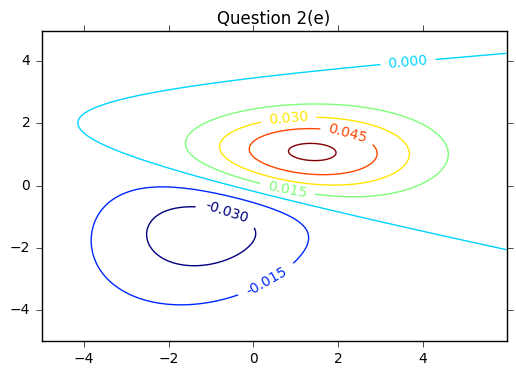

In [87]:
x = np.arange(-5, 6, delta)
y = np.arange(-5, 5, delta)
X, Y = np.meshgrid(x, y)

Z1 = mlab.bivariate_normal(X, Y, 2, 1, 1, 1, 0)
Z2 = mlab.bivariate_normal(X, Y, 2, 2, -1, -1, 1)
Z = Z1 - Z2

plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Question 2(e)')
plt.show()

# Question 3

In [68]:
N = 100
samples1 = np.random.normal(3, 3, N)
samples2 = samples1 / 2 + np.random.normal(4, 2, N)
samples = np.vstack((samples1, samples2))

## Question 3(a)

In [176]:
mean = np.mean(samples, axis=1)
mean2 = np.array((np.mean(samples1), np.mean(samples2)))
print(mean, mean == mean2)
print(samples.shape)

[ 3.06931694  5.58598461] [ True  True]
(2, 100)


## Question 3(b)

In [182]:
cov = np.cov(samples)
print(cov)

[[ 8.63308673  5.4931018 ]
 [ 5.4931018   6.9937489 ]]


## Question 3(c)

In [143]:
eig_vals, eig_vects = np.linalg.eig(cov)
eig_vect_1 = eig_vects[:,0]
eig_vect_2 = eig_vects[:,1]
print(eig_vals)
print(eig_vects)

[ 11.68850053   2.56930817]
[[ 0.76801928 -0.64042673]
 [ 0.64042673  0.76801928]]


In [142]:
print("1/eigval * Av - v = 0")
print("Check for eigenvalue 1: [0, 0] == {}".format(np.dot(cov, eig_vect_1) / eig_vals[0] - eig_vect_1))
print("Check for eigenvalue 2: [0, 0] == {}".format(np.dot(cov, eig_vect_2) / eig_vals[1] - eig_vect_2))
print("Magnitudes: {} {}".format(np.linalg.norm(eig_vect_1), np.linalg.norm(eig_vect_2)))

1/eigval * Av - v = 0
Check for eigenvalue 1: [0, 0] == [ 0.  0.]
Check for eigenvalue 2: [0, 0] == [ -5.55111512e-16  -2.22044605e-16]
Magnitudes: 0.9999999999999999 0.9999999999999999


## Question 3(d)

Magnitudes are: 11.688500532783822 2.569308172808347
Eigenvector 1 is (8.976993715807243, 7.485628132043759)
Eigenvector 2 is (-1.6454536220723825, 1.9732782025017772)
Inner product of eigenvectors is 0.0


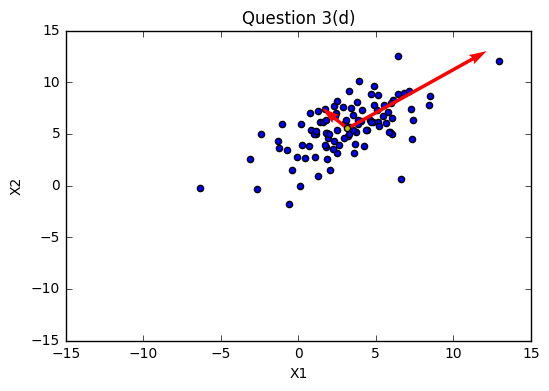

In [163]:
plt.scatter(samples1, samples2)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.title('Question 3(d)')
ax = plt.gca()

scaled_eig_vect_1 = eig_vect_1 * eig_vals[0]
scaled_eig_vect_2 = eig_vect_2 * eig_vals[1]

print("Magnitudes are: {} {}".format(np.linalg.norm(scaled_eig_vect_1), np.linalg.norm(scaled_eig_vect_2)))
print("Eigenvector 1 is ({}, {})".format(scaled_eig_vect_1[0], scaled_eig_vect_1[1]))
print("Eigenvector 2 is ({}, {})".format(scaled_eig_vect_2[0], scaled_eig_vect_2[1]))
print("Inner product of eigenvectors is {}".format((np.inner(scaled_eig_vect_1, scaled_eig_vect_2))))

ax.quiver(mean[0], mean[1], scaled_eig_vect_1[0], scaled_eig_vect_1[1], color='r', angles='xy', scale_units='xy', scale=1)
ax.quiver(mean[0], mean[1], scaled_eig_vect_2[0], scaled_eig_vect_2[1], color='r', angles='xy', scale_units='xy', scale=1)

# plotting the mean for reference
plt.scatter(mean[0], mean[1], c=('y'))

plt.xlabel('X1')
plt.ylabel('X2')

plt.savefig('q3dplot.png', bbox_inches='tight')
plt.show()

## Question 3(e)

In [166]:
U = np.vstack((eig_vect_1, eig_vect_2))
centered = np.vstack((samples1 - mean[0], samples2 - mean[1]))
rotated_samples = np.dot(U.T, centered)

(100,)


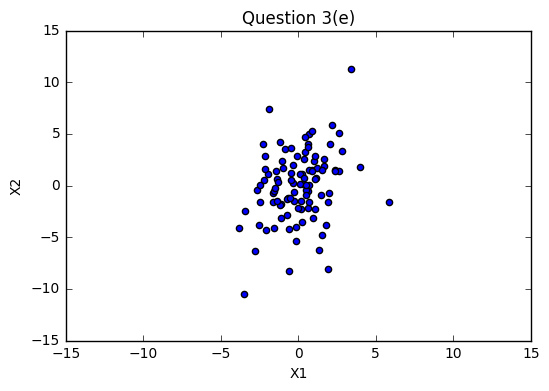

In [171]:
plt.scatter(rotated_samples[0], rotated_samples[1])
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.title('Question 3(e)')
ax = plt.gca()

plt.xlabel('X1')
plt.ylabel('X2')

plt.savefig('q3eplot.png', bbox_inches='tight')
plt.show()

# Question  6

In [47]:
MNIST_FILEPATH = "hw3_mnist_dist/train.mat"
NUM_MNIST_TRAINING_IMAGES = 10000

In [48]:
def load_mnist(filepath):
    data = sio.loadmat(filepath)["trainX"]
    np.random.shuffle(data)
    order = np.arange(data.shape[1] - 1)
    training_data = np.take(data, order, 1)
    labels = np.take(data, [-1], 1)
    return training_data[:NUM_MNIST_TRAINING_IMAGES], labels[:NUM_MNIST_TRAINING_IMAGES], \
            training_data[NUM_MNIST_TRAINING_IMAGES:], labels[NUM_MNIST_TRAINING_IMAGES:]
    
def load_spam(filepath):
    data = sio.loadmat(filepath)
    order = np.arange(data["training_data"].shape[0])
    np.random.shuffle(order)
    training_data = np.take(data["training_data"], order, 0)
    labels = np.take(data["training_labels"], order, 1).T
    
    num_validation = int(labels.shape[0] * FRAC_SPAM_TRAINING)
    return training_data[:num_validation], labels[:num_validation], \
            training_data[num_validation:], labels[num_validation:]

In [6]:
def print_mnist(arr, label):
    mnist_image = ""
    for x in range(28 * 28 - 1):
        if x % 28 == 0:
            mnist_image += '\n'
        if (arr[x] == 0):
            mnist_image += ' '
        else:
            mnist_image += '*'
    print(label)
    print(mnist_image)

In [71]:
data = load_mnist(MNIST_FILEPATH)

In [72]:
i = 100
print_mnist(data[0][i], data[1][i])

[3]

                            
                            
                            
                            
                            
       *************        
        *************       
        *************       
         **     *****       
                *****       
               *****        
              *****         
           ********         
           *******          
          *******           
           ********         
           *********        
              ******        
               *****        
              ******        
           ********         
         *********          
       **********           
      ********              
      ******                
                            
                            
                           


In [12]:
def MLE_Gaussian(classified_data, means):
    covs = {}
    for label in range(10):
        n, d = len(classified_data[label]), classified_data[label].shape[1]
        covs[label] = np.zeros((d, d))
        for X in classified_data[label]:
            centered = X - means[label]
            covs[label] += np.outer(centered, centered)
        covs[label] /= n
    return covs

## Question 6(a)

In [49]:
valid_data, valid_labels, train_data, train_labels = load_mnist(MNIST_FILEPATH)
train_data = train_data.astype(float)
valid_data = valid_data.astype(float)

In [25]:
train_data = preprocessing.normalize(train_data)
valid_data = preprocessing.normalize(valid_data)

In [9]:
def mnist_contrast_normalize(data):
    for i in range(len(data)):
        data[i] = data[i].astype(float) / np.linalg.norm(data[i])

In [11]:
def classify_mnist(data, labels):
    classified_mnist = {}
    for label in range(10):
        classified_mnist[label] = data[labels[:,0] == label]
    return classified_mnist
        
classified_mnist = classify_mnist(train_data, train_labels)

In [12]:
def calculate_mnist_means(classified_mnist):
    mnist_means = {}
    for label in range(10):
        mnist_means[label] = np.mean(classified_mnist[label].T, axis=1)
    return mnist_means

mnist_means = calculate_mnist_means(classified_mnist)

In [13]:
def calculate_mnist_covs(classified_mnist):
    mnist_covs = {}
    for label in range(10):
        mnist_covs[label] = np.cov(classified_mnist[label].T)
    return mnist_covs
        
mnist_covs = calculate_mnist_covs(classified_mnist)

## Question 6(b)

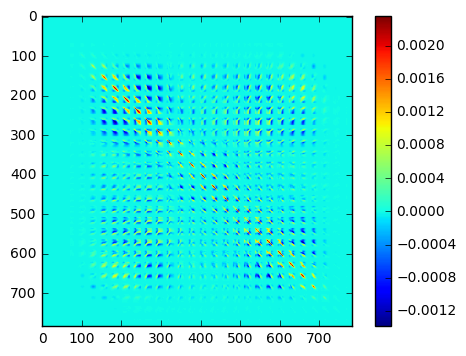

In [12]:
plt.imshow(mnist_covs[5])
colorbar()
plt.show()

The diagonal of the covariance matrix is mainly positive, which the off-diagonal terms are mainly negative for the class 5.

## Question 6(c)(i): LDA Analysis

In [58]:
def get_second_min(eig_vals):
    for eig in reversed(eig_vals):
        if eig > 0:
            return eig

def kludge(M):
    hack = np.identity(M.shape[0]) * 0.05 #get_second_min(np.linalg.eigvals(M))
    M = M + hack
    return M

In [59]:
def calculate_LDA_sigma(classified_mnist):
    mnist_covs = calculate_mnist_covs(classified_mnist)
    LDA_sigma = np.zeros(mnist_covs[0].shape)
    for label in range(10):
        LDA_sigma += mnist_covs[label]
    if np.linalg.det(LDA_sigma) == 0:
        LDA_sigma = kludge(LDA_sigma)
    return LDA_sigma

def LDA_train(samples, labels):
    classified_mnist = classify_mnist(samples, labels)
    means, LDA_sigma = calculate_mnist_means(classified_mnist), calculate_LDA_sigma(classified_mnist)
    distr = {}
    for i in range(10):
        distr[i] = stats.multivariate_normal(mean=means[i], cov=LDA_sigma)
    return distr

def LDA_validate(samples, labels, distr):
    error = 0
    for s, lb in zip(samples, labels):
        best_guess, best_pdf = -1, 0
        for cls, d in distr.items():
            p = d.pdf(s)
            if p > best_pdf:
                best_guess, best_pdf = cls, p
        if best_guess != lb[0]:
            error += 1
    return error / len(labels)

In [34]:
classifiers = {}
sample_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
for size in sample_sizes:
    classifiers[size] = LDA_train(train_data[:size], train_labels[:size])

In [75]:
LDA_performance = {}
sample_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
for size in sample_sizes:
    classifier = LDA_train(train_data[:size], train_labels[:size])
    LDA_performance[size] = LDA_validate(valid_data, valid_labels, classifier)
    print("size {}: {}".format(size, LDA_performance[size]))

size 100: 0.2378
size 200: 0.1806
size 500: 0.1471
size 1000: 0.1407
size 2000: 0.1355
size 5000: 0.1322
size 10000: 0.1321
size 30000: 0.1321
size 50000: 0.1319


In [23]:
classifiers = {}
sample_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
for size in sample_sizes:
    classifiers[size] = LDA_train(train_data[:size], train_labels[:size])

In [55]:
lda_error = []
for i in sample_sizes:
    lda_error.append(LDA_performance[i])
print(lda_error)

[0.2378, 0.1806, 0.1471, 0.1407, 0.1355, 0.1322, 0.1321, 0.1321, 0.1319]


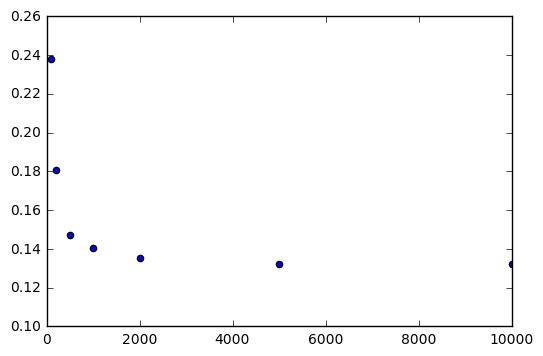

In [56]:
plt.scatter(sample_sizes, lda_error)
plt.xlim([0,10000])
plt.savefig('mnist_training_plot.png', bbox_inches='tight')
plt.show()

In [39]:
def kaggle_LDA_predict(samples, distr):
    counter = 0
    predictions = []
    for s in samples:
        if counter % 1000 == 0:
            print(counter)
        counter += 1
        guess, best_pdf = 0, 0
        for cls, d in distr.items():
            p = d.pdf(s)
            if p > best_pdf:
                guess, best_pdf = cls, p
        predictions.append(guess)
    return predictions

In [72]:
KAGGLE_MNIST_FILEPATH = "hw3_mnist_dist/test.mat"
mnist_test = sio.loadmat(KAGGLE_MNIST_FILEPATH)["testX"]
mnist_test = preprocessing.normalize(mnist_test)

In [74]:
mnist_pred = kaggle_LDA_predict(mnist_test, classifiers[50000])

In [46]:
f = open('mnist.csv', 'w')
f.write("Id,Category\n")
i = 0
for x in mnist_pred:
    f.write("{},{}\n".format(i, x))
    i += 1
f.close()

## Question 6(c)(ii): QDA Analysis

In [145]:
def QDA_train(samples, labels):
    classified_mnist = classify_mnist(samples, labels)
    means, covs = calculate_mnist_means(classified_mnist), calculate_mnist_covs(classified_mnist)
    for label in range(10):
        if np.linalg.det(covs[label]) == 0:
            covs[label] = kludge(covs[label])
    distr = {}
    for i in range(10):
        distr[i] = stats.multivariate_normal(mean=means[i], cov=covs[i])
    return distr

def QDA_validate(samples, labels, distr):
    error = 0
    for s, lb in zip(samples, labels):
        best_guess, best_pdf = -1, 0
        for cls, d in distr.items():
            p = d.pdf(s)
            if p > best_pdf:
                best_guess, best_pdf = cls, p
        if best_guess != lb[0]:
            error += 1
    return error / len(labels)

In [146]:
qda_classifiers = {}
sample_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
for size in sample_sizes:
    qda_classifiers[size] = QDA_train(train_data[:size], train_labels[:size])

In [76]:
QDA_performance = {}
sample_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
for size in sample_sizes:
    QDA_performance[size] = QDA_validate(valid_data, valid_labels, qda_classifiers[size])
    print("size {}: {}".format(size, QDA_performance[size]))

size 100: 0.2191
size 200: 0.1618
size 500: 0.1468
size 1000: 0.1468
size 2000: 0.1367
size 5000: 0.1351
size 10000: 0.1305
size 30000: 0.1376
size 50000: 0.1369


[0.2191, 0.1618, 0.1468, 0.1468, 0.1367, 0.1351, 0.1305, 0.1376, 0.1369]


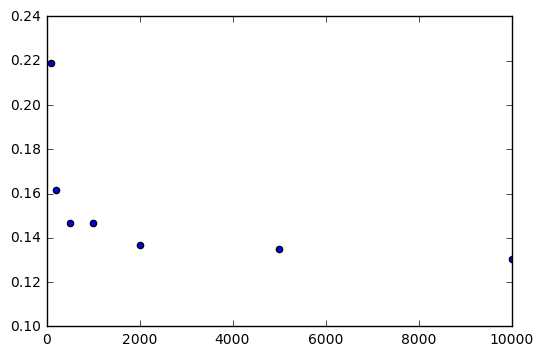

In [71]:
qda_error = []
for i in sample_sizes:
    qda_error.append(QDA_performance[i])
print(qda_error)

plt.scatter(sample_sizes, qda_error)
plt.xlim([0,10000])
plt.savefig('mnist_training_plot.png', bbox_inches='tight')
plt.show()

## Question 6(c)(iii)

LDA performed better with an error rate of 0.1319 compared to QDA with an error rate of 0.1369. Both were trained with the same 50,000 training set and 10,000 validation set. QDA most likely overfit the data.

## Question 6(c)(iv)

My optimum prediction rate on Kaggle was 0.88340

## Question 6(d)

In [2]:
SPAM_FILEPATH = "dist/spam_data.mat"
FRAC_SPAM_TRAINING = 0.1

def load_spam(filepath):
    data = sio.loadmat(filepath)
    order = np.arange(data["training_data"].shape[0])
    np.random.shuffle(order)
    training_data = np.take(data["training_data"], order, 0)
    labels = np.take(data["training_labels"], order, 1).T
    
    num_validation = int(labels.shape[0] * FRAC_SPAM_TRAINING)
    return training_data[:num_validation], labels[:num_validation], \
            training_data[num_validation:], labels[num_validation:]
    
spam_valid_data, spam_valid_labels, spam_train_data, spam_labels = load_spam(SPAM_FILEPATH)

In [3]:
spam_train_data = preprocessing.normalize(spam_train_data)
spam_valid_data = preprocessing.normalize(spam_valid_data)

In [64]:
def classify_spam(data, labels):
    classified_spam = {}
    for label in range(2):
        classified_spam[label] = data[labels[:,0] == label]
    return classified_spam

def calculate_spam_means(classified_spam):
    means = {}
    for label in range(2):
        means[label] = np.mean(classified_spam[label].T, axis=1)
    return means

def calculate_spam_covs(classified_spam):
    covs = {}
    for label in range(2):
        covs[label] = np.cov(classified_spam[label].T)
    return covs

def get_second_min(eig_vals):
    for eig in reversed(eig_vals):
        if eig > 0:
            return eig
        
def kludge(M):
    hack = np.identity(M.shape[0]) * 0.05 #get_second_min(np.linalg.eigvals(M)) #0.05 #max(np.linalg.eigvals(M)) 
    M = M + hack
    return M
        
def calculate_LDA_sigma(classified_spam, n):
    covs = calculate_spam_covs(classified_spam)
    LDA_sigma = np.zeros(covs[0].shape)
    for label in range(2):
        LDA_sigma += covs[label]
    LDA_sigma /= n
    if np.linalg.det(LDA_sigma) == 0 or np.linalg.matrix_rank(LDA_sigma) != LDA_sigma.shape[0]:
        LDA_sigma = kludge(LDA_sigma)
    return LDA_sigma

class ldf:
    def __init__(self, term1, term2, pi, c):
        self.term1 = term1
        self.term2 = term2
        self.pi = pi
        self.c = c
        
    def ldf(self, s):
        t1 = np.matmul(self.term1, s)
        t2 = self.term2 / -2
        return t1 + t2 + self.pi

def spam_LDA_train(samples, labels):
    classified = classify_spam(samples, labels)
    means, LDA_sigma = calculate_spam_means(classified), calculate_LDA_sigma(classified, len(labels))
    distr = {}
    for i in range(2):
        inv = np.linalg.inv(LDA_sigma)
        term1 = np.matmul(means[i].T, inv)
        term2 = np.matmul(np.matmul(means[i].T, inv), means[i])
        pi = np.log(len(classified[i]) / len(labels))
        distr[i] = ldf(term1, term2, pi, i)
    return distr

def spam_QDA_train(samples, labels):
    classified = classify_spam(samples, labels)
    means, covs = calculate_spam_means(classified), calculate_spam_covs(classified)
    for label in range(2):
        covs[label] /= len(classified[label])
        if np.linalg.det(covs[label]) == 0:
            covs[label] = kludge(covs[label])
    distr = {}
    for i in range(2):
        distr[i] = stats.multivariate_normal(mean=means[i], cov=covs[i])
    return distr

def validate(samples, labels, distr):
    error = 0
    for s, lb in zip(samples, labels):
        best_guess, best_pdf = -1, -float('inf')
        for cls in range(2):
            p = distr[cls].ldf(s)
            if p > best_pdf:
                best_guess, best_pdf = cls, p
        if best_guess != lb[0]:
            error += 1
    return error / len(labels)

def spam_kaggle_LDA_predict(samples, distr):
    counter = 0
    predictions = []
    for s in samples:
        if counter % 1000 == 0:
            print(counter)
        counter += 1
        guess, best_pdf = 0, 0
        for cls, d in distr.items():
            p = d.pdf(s)
            if p > best_pdf:
                guess, best_pdf = cls, p
        predictions.append(guess)
    return predictions

In [65]:
spam_classifiers = {}
sample_sizes = [len(spam_labels)]
for size in sample_sizes:
    spam_classifiers[size] = spam_LDA_train(spam_train_data[:size], spam_labels[:size])

1.09924845642e-23


In [66]:
spam_LDA_performance = {}
for size in sample_sizes:
    spam_LDA_performance[size] = validate(spam_valid_data, spam_valid_labels, spam_classifiers[size])
    print("size {}: {}".format(size, spam_LDA_performance[size]))

size 21332: 0.24219409282700421


In [71]:
spam_qda_classifiers = {}
for size in sample_sizes:
    spam_qda_classifiers[size] = spam_QDA_train(spam_train_data[:size], spam_labels[:size])

LinAlgError: singular matrix

In [40]:
spam_QDA_performance = {}
for size in sample_sizes:
    spam_QDA_performance[size] = validate(spam_valid_data, spam_valid_labels, spam_qda_classifiers[size])
    print("size {}: {}".format(size, spam_QDA_performance[size]))

size 21332: 0.5025316455696203


In [37]:
spam_test = sio.loadmat(SPAM_FILEPATH)['test_data']
spam_test = preprocessing.normalize(spam_test)
spam_pred = spam_kaggle_LDA_predict(spam_test, spam_classifiers[len(spam_labels)])

0
1000
2000
3000
4000
5000


In [38]:
f = open('spam.csv', 'w')
f.write("Id,Category\n")
i = 0
for x in spam_pred:
    f.write("{},{}\n".format(i, x))
    i += 1
f.close()